<a href="https://colab.research.google.com/github/Rajnishmaurya/ML-/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve,roc_auc_score
##from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Rajnishmaurya/ML-/main/winequality_red.csv")

In [3]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

The dataset contains following input variables:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

 and the Output variables gives the quality of the wine based on the input variables
12. quality(0-10)

In [5]:
for column in data.columns:
  print(column)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [6]:
X=data.drop(columns=['quality'])
y=data['quality']

In [7]:
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [8]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=355)

In [10]:
# let's first visualize the tree on the data without doing any pre processing
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [11]:
feature_name=list(X.columns)
class_name=list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [12]:
# create a dot_file which stores the tree structures
dot_data=export_graphviz(clf,feature_names=feature_name,rounded=True,filled=True)
# Draw a graph
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [13]:
clf.score(x_train,y_train)

1.0

In [14]:
y_pred=clf.predict(x_test)

In [15]:
y_pred

array([5, 5, 5, 5, 7, 6, 5, 6, 5, 6, 5, 6, 6, 4, 7, 6, 6, 7, 7, 7, 6, 5,
       5, 6, 6, 6, 5, 5, 6, 5, 5, 7, 6, 6, 5, 6, 5, 6, 6, 7, 3, 6, 5, 4,
       6, 6, 6, 6, 6, 6, 4, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 4, 5, 7, 6,
       6, 6, 7, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 4, 7, 5, 5, 6, 5, 5, 5, 4,
       5, 5, 7, 7, 6, 7, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 7, 8, 6, 7,
       6, 7, 5, 5, 4, 6, 5, 7, 4, 6, 5, 6, 5, 5, 7, 7, 5, 6, 5, 6, 6, 7,
       5, 5, 7, 6, 5, 6, 5, 5, 5, 7, 7, 6, 8, 7, 6, 5, 6, 6, 6, 7, 5, 6,
       6, 5, 5, 6, 7, 5, 6, 6, 5, 6, 4, 7, 6, 6, 6, 7, 6, 6, 8, 7, 4, 6,
       7, 7, 5, 7, 5, 6, 6, 6, 6, 7, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7,
       7, 4, 5, 5, 6, 5, 7, 5, 5, 6, 6, 5, 7, 8, 8, 5, 5, 6, 6, 6, 5, 5,
       6, 6, 5, 5, 5, 5, 7, 8, 5, 6, 5, 6, 5, 5, 6, 7, 5, 6, 5, 5, 5, 5,
       5, 5, 7, 7, 6, 4, 5, 5, 6, 5, 5, 7, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 5, 6, 6, 3, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 7, 5, 7, 5, 6, 6,
       6, 7, 5, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 5, 7,

In [16]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.6333333333333333

In [17]:
scalar=StandardScaler()
x_transform=scalar.fit_transform(X)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_transform,y,test_size=0.3,random_state=355)

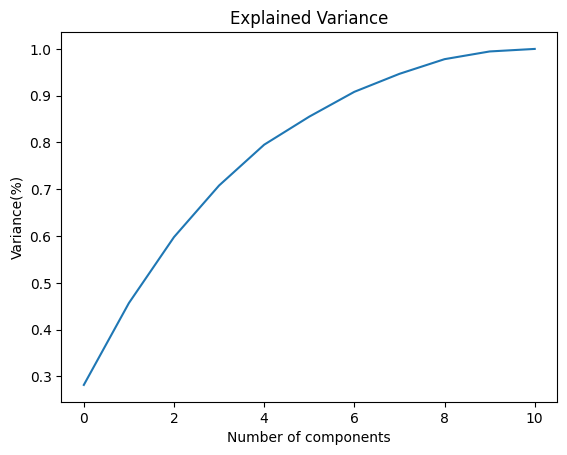

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca=PCA()
principalComponents=pca.fit_transform(x_transform)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance(%)')
plt.title("Explained Variance")

plt.show()

We can see that around 95% of the variance is being explained by 8 components. So, instead of giving all 11 columns as input in our algorithm let's use these 8 principal components instead.

In [20]:
pca=PCA(n_components=8)
new_data=pca.fit_transform(x_transform)
principal_x =pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8',])

In [21]:
principal_x

PC-1      PC-2      PC-3      PC-4      PC-5      PC-6      PC-7  \
0    -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
1    -0.799170  1.856553 -0.911690  0.548066 -0.018392  0.929714 -1.009829   
2    -0.748479  0.882039 -1.171394  0.411021 -0.043531  0.401473 -0.539553   
3     2.357673 -0.269976  0.243489 -0.928450 -1.499149 -0.131017  0.344290   
4    -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
...        ...       ...       ...       ...       ...       ...       ...   
1594 -2.150500  0.814286  0.617063  0.407687 -0.240936  0.054835  0.170812   
1595 -2.214496  0.893101  1.807402  0.414003  0.119592 -0.674711 -0.607970   
1596 -1.456129  0.311746  1.124239  0.491877  0.193716 -0.506410 -0.231082   
1597 -2.270518  0.979791  0.627965  0.639770  0.067735 -0.860408 -0.321487   
1598 -0.426975 -0.536690  1.628955 -0.391716  0.450482 -0.496154  1.189132   

          PC-8  
0    -0.282258  
1     0.762587  
2     0.597946  
3    -0.455375  
4    -0.282258  
...        ...  
1594 -0.355866  
1595 -0.247640  
1596  0.079382  
1597 -0.468876  
1598  0.042176  

[1599 rows x 8 columns]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(principal_x,y,test_size=0.3,random_state=355)
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.5854166666666667

In [23]:
# We are tuning three parameters right now, we are passing the different values for both parameters
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [24]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)

In [25]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [29]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [30]:
grid_search.best_score_

0.5978219090326713

In [31]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=30,min_samples_leaf=1,min_samples_split=2,splitter='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30)

In [32]:
clf.score(x_test,y_test)

0.525